In [ ]:
# Should have code to fetch adb pull and adb list 
# the files from the phone


In [1]:
#
# Now load in the file with the logging data in it
#
import pandas, numpy, matplotlib
import sys
sys.path.append("../../hacktrack")
from hacktrack import loaders
fname = "udpstream.log"
fname = "/home/julian/repositories/Future-Hangglider/hangspotdetection/vidprocessing/hdata-2018-11-20_18-41-45.log"
fd = loaders.FlyDat(fname)
fd.LoadC("UZ")

from matplotlib import pyplot as plt
%matplotlib inline


Setting knowndate 2018-11-20
should be same 2018-11-20 00:00:00 2018-11-20 00:00:00
badline End(79319,12412)

F:28296, V:1, Z:50884, U:138, aZ:9480, aF:2931
linAdifftime -110497.84479895105 count 11440
Made for Q 0 last index 0
Made for V 1 last index 1
Warning, using guessed (not GPS) timing corrected value on V 1
timeflightindexerror
Made for U 138 last index 138
Warning, using guessed (not GPS) timing corrected value on U 138
BAD VALUES 2024 [(225, 'Zt0002B9B2x0009y0000z16BBa0377bC38Cc146Fw0377xC38Cy146Fz036Cs03\n'), (285, 'Zt0002BCA2xBBFByF916z4B02aABC4bEC16cFB02w02F9xC44By16ABz02ECsF4\n'), (292, 'Zt0002BD05xBBF7y3C16z6A03aF8C4bBC16cF702w033CxC46Ay16F8z02BCsF5\n')]
Made for Z 50884 last index 48860
Warning, using guessed (not GPS) timing corrected value on Z 50884


In [125]:
# 
# Convert the up led on off times to a new sequence in seconds
#
tU0 = fd.pU.index[0]
fd.pU["fn"] = (fd.pU.index.to_series() - t0)/pandas.Timedelta(seconds=1)
fd.pU["fv"] = fd.pU.Dust
dfled = fd.pU[["fn", "fv"]]
dfled["i"] = list(range(len(dfled)))
dfled = dfled.set_index("i")


In [112]:
dfhangspot = pandas.read_csv("hangspot.csv")

In [127]:
#
# Find time relation between hangspot video frames and the logging timing
#
dfhangspot["bsm"] = (dfhangspot.sm>10000)*1
bstepup = (dfhangspot.bsm == 1) & (dfhangspot.bsm.shift()==0)
bstepdown = (dfhangspot.bsm == 1) & (dfhangspot.bsm.shift(-1)==0)
dfframeflash = dfhangspot[bstepup | bstepdown][["fn"]].copy()
dfframeflash["fv"] = 0
dfframeflash["fv"][bstepup] = 1
dfframeflash["i"] = list(range(len(dfframeflash)))
dfframeflash = dfframeflash.set_index("i")


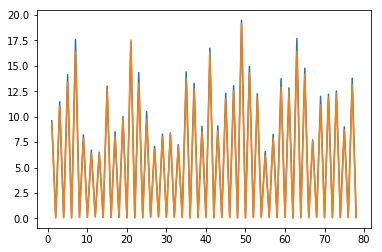

In [136]:
def pldfgaps(fn):
    return fn.diff(1).shift(-1).values/fn.diff(1).values

koffs = 8
dfframeflash["fnled"] = dfled.fn.shift(-koffs)
#plt.plot(pldfgaps(dfframeflash.fn))
#plt.plot(pldfgaps(dfled.fn.shift(-koffs)))

ldfframeflash = dfframeflash[:80]
plt.plot(pldfgaps(ldfframeflash.fn))
plt.plot(pldfgaps(ldfframeflash.fnled))



Frame fac 0.033332 displacement 33.059821, meaning 30.001476 frames/sec


Text(0.5,1,'values here should be less than one frame time')

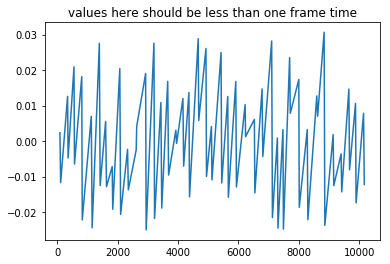

In [143]:
#plt.plot(ldfframeflash.fn, ldfframeflash.fnled)
mframe, cframe = numpy.polyfit(ldfframeflash.fn, ldfframeflash.fnled, deg=1)
print("Frame fac %f displacement %f, meaning %f frames/sec" % (mframe, cframe, 1/mframe))
plt.plot(ldfframeflash.fn, ldfframeflash.fn*mframe + cframe - ldfframeflash.fnled)
plt.title("values here should be less than one frame time")

In [147]:
dfhangspot["t"] = tU0 + (dfhangspot.fn*mframe + cframe)*pandas.Timedelta(seconds=1)
dfhangspot = dfhangspot.set_index("t")

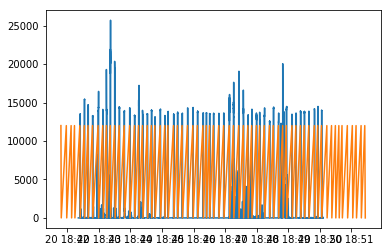

In [153]:
plt.plot(dfhangspot.sm)
plt.plot(fd.pU.Dust*12000)

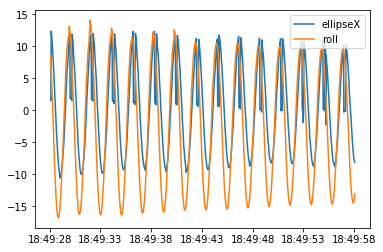

In [187]:
t0 = tU0 + pandas.Timedelta(seconds=460)
t1 = tU0 + pandas.Timedelta(seconds=490)
plt.plot((dfhangspot[t0:t1].elx-800)/50, label="ellipseX")
plt.plot(fd.pZ[t0:t1].roll, label="roll")
plt.legend()


,Unnamed: 0,ron,roff,dron,droff,pon,i
0,0,0.000,0.648,0.648,9.617,0.067381,0
1,1,10.265,11.031,0.766,8.339,0.091858,1
2,2,19.370,20.330,0.960,5.430,0.176796,2
3,3,25.760,26.587,0.827,9.337,0.088572,3
4,4,35.924,36.738,0.814,7.642,0.106517,4
5,5,44.380,44.964,0.584,6.474,0.090207,5
6,6,51.438,52.032,0.594,7.975,0.074483,6
7,7,60.007,60.614,0.607,9.937,0.061085,7
8,8,70.551,71.549,0.998,7.881,0.126634,8
9,9,79.430,80.370,0.940,6.015,0.156276,9
